In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
hp = pd.read_csv('sp500_stocks_4.18.2024.csv', parse_dates=True, index_col='Date')
hp = hp[(hp.index >= pd.Timestamp('2024-01-01')) & (hp.index <= pd.Timestamp('2024-12-31'))]


In [3]:
hp.head()

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2024-01-02,MMM,90.176018,91.973244,92.525085,90.677261,90.819397,3321053.0
2024-01-03,MMM,88.364296,90.125420,91.521736,89.297661,91.329430,3547575.0
2024-01-04,MMM,88.675812,90.443146,91.421402,90.058525,90.367889,3319976.0
2024-01-05,MMM,89.020119,90.794312,91.546822,89.924751,90.284279,1991579.0
2024-01-08,MMM,89.241463,91.020065,91.103676,89.958191,90.518394,2535042.0


In [4]:
mshp = hp[hp['Symbol'] == 'MMM']

In [5]:
num_rows = mshp.shape[0]
print("Number of rows:", num_rows)

Number of rows: 74


In [6]:
mshp.tail()

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2024-04-11,MMM,93.180000,93.180000,93.559998,92.480003,92.839996,2993700.0
2024-04-12,MMM,91.309998,91.309998,92.809998,91.150002,92.760002,3590100.0
2024-04-15,MMM,91.300003,91.300003,92.779999,90.750000,91.980003,3674800.0
2024-04-16,MMM,91.050003,91.050003,91.330002,90.169998,90.940002,3037000.0
2024-04-17,MMM,90.959999,90.959999,92.105003,90.330200,91.730003,3366494.0


C:\Users\ericz\AppData\Local\Temp\ipykernel_26924\1295417590.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:,.2f}'.format(x) for x in plt.gca().get_yticks()])


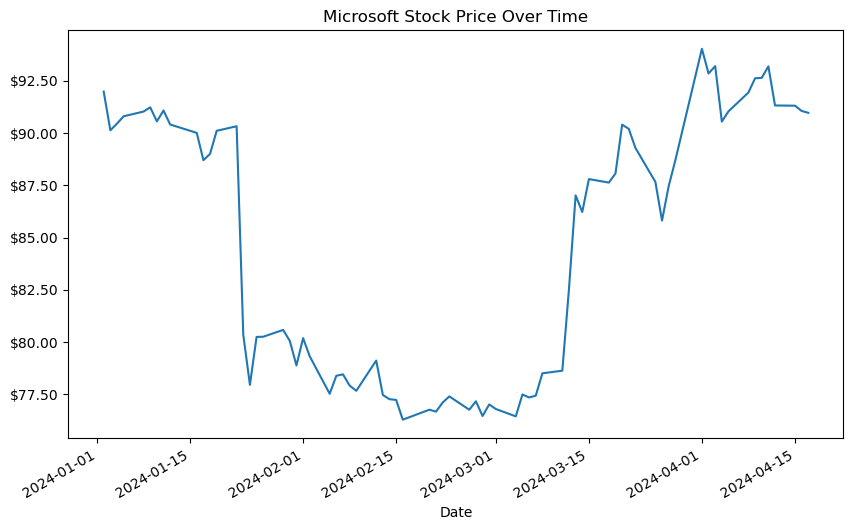

In [7]:
import matplotlib.pyplot as plt

# Plot the closing price history
mshp['Close'].plot(title='Microsoft Stock Price Over Time', figsize=(10, 6))
plt.gca().set_yticklabels(['${:,.2f}'.format(x) for x in plt.gca().get_yticks()])
plt.show()

In [8]:
result = adfuller(mshp['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.295093
p-value: 0.631414


In [9]:
mshp['Differenced_Close'] = mshp['Close'] - mshp['Close'].shift(1)
mshp_diff = mshp.dropna()

C:\Users\ericz\AppData\Local\Temp\ipykernel_26924\3269642563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mshp['Differenced_Close'] = mshp['Close'] - mshp['Close'].shift(1)


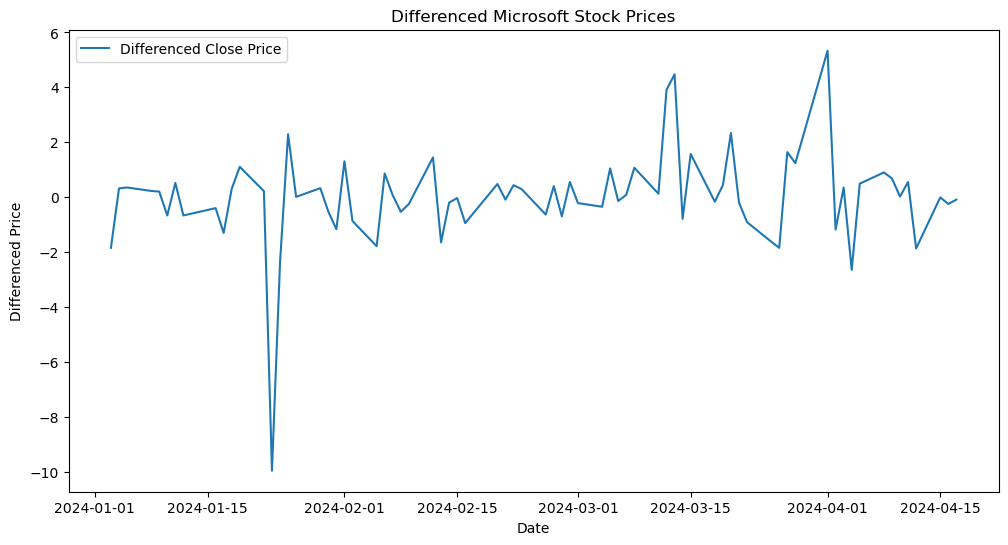

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(mshp_diff['Differenced_Close'], label='Differenced Close Price')
plt.title('Differenced Microsoft Stock Prices')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.legend()
plt.show()

In [11]:
result = adfuller(mshp_diff['Differenced_Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -7.589181
p-value: 0.000000


In [12]:
result_diff = adfuller(mshp_diff['Differenced_Close'])
print('ADF Statistic after differencing: %f' % result_diff[0])
print('p-value after differencing: %f' % result_diff[1])
for key, value in result_diff[4].items():
    print('Critical Value (%s): %f' % (key, value))

ADF Statistic after differencing: -7.589181
p-value after differencing: 0.000000
Critical Value (1%): -3.524624
Critical Value (5%): -2.902607
Critical Value (10%): -2.588679


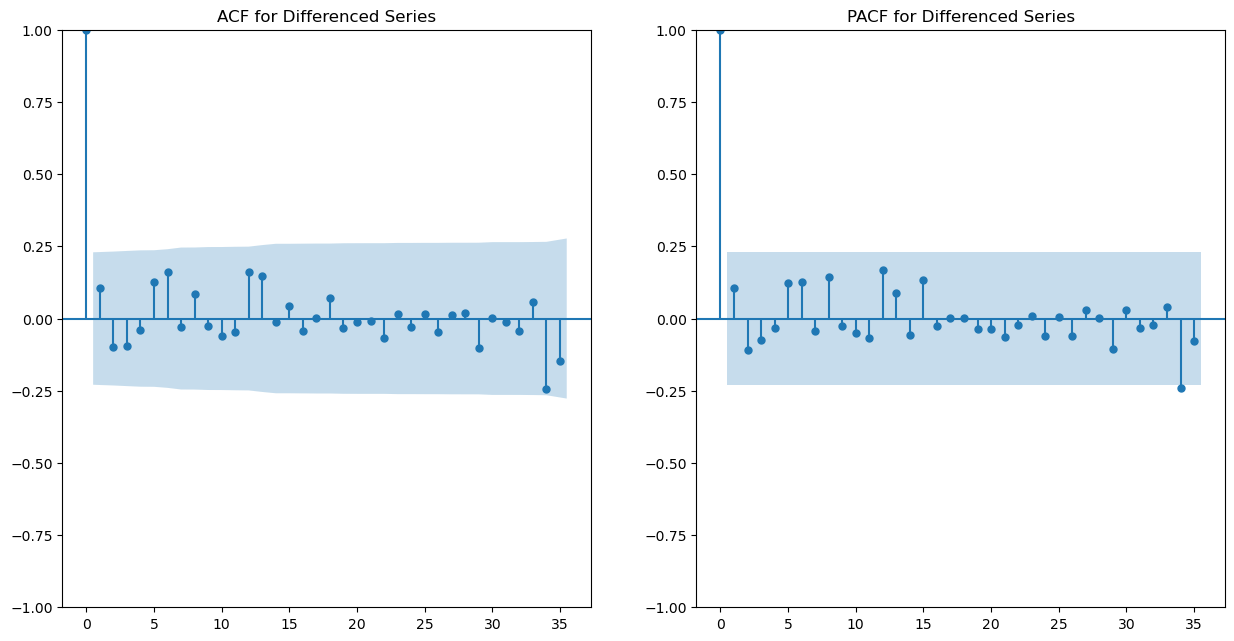

In [14]:
# Plot ACF and PACF
plt.figure(figsize=(15, 7.5))
plt.subplot(121)
plot_acf(mshp_diff['Differenced_Close'], ax=plt.gca(), lags=35)
plt.title('ACF for Differenced Series')

plt.subplot(122)
plot_pacf(mshp_diff['Differenced_Close'], ax=plt.gca(), lags=35)
plt.title('PACF for Differenced Series')
plt.show()

In [19]:
# Fit an ARIMA model
# Example parameters: ARIMA(1,1,1) - adjust based on ACF and PACF plots or grid search
model = ARIMA(mshp['Close'], order=(5, 1, 5))
fitted_model = model.fit()

# Print out the summary
print(fitted_model.summary())

C:\Users\ericz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ericz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ericz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   74
Model:                 ARIMA(5, 1, 5)   Log Likelihood                -142.171
Date:                Fri, 19 Apr 2024   AIC                            306.343
Time:                        16:37:00   BIC                            331.538
Sample:                             0   HQIC                           316.383
                                 - 74                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2346      0.897      0.261      0.794      -1.524       1.993
ar.L2         -0.3916      0.916     -0.427      0.669      -2.187       1.404
ar.L3          0.0033      1.108      0.003      0.9

C:\Users\ericz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [20]:
# Forecast the next 5 days
forecast = fitted_model.forecast(steps=10)
print(forecast)

74    91.808055
75    91.652637
76    91.765061
77    91.970622
78    91.596855
79    91.048264
80    91.118470
81    91.249780
82    91.230787
83    91.474752
Name: predicted_mean, dtype: float64


C:\Users\ericz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ericz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


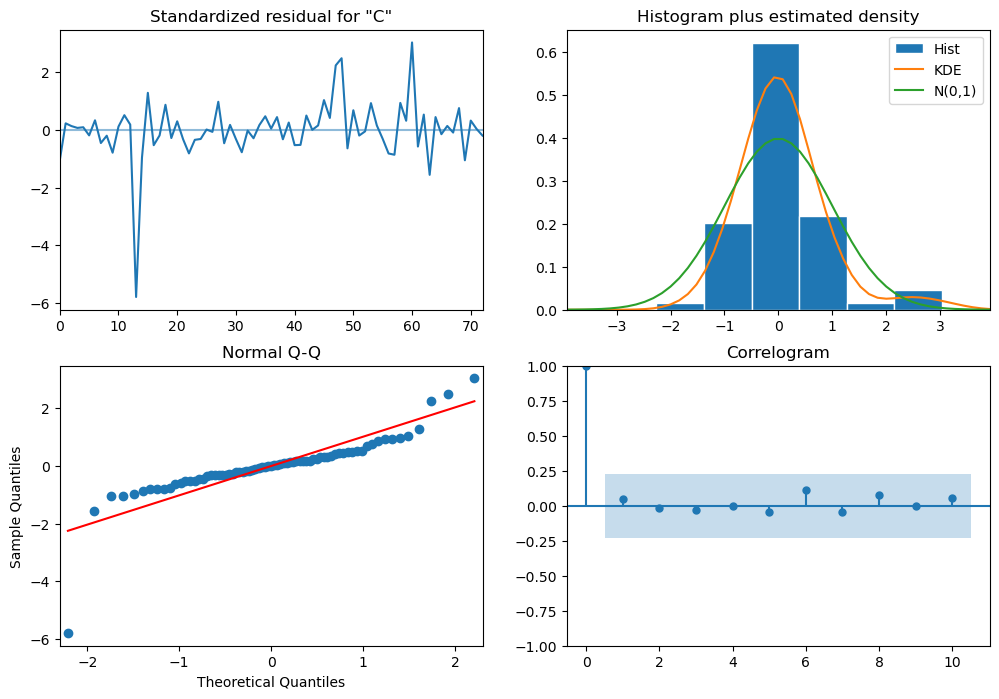

In [21]:
fitted_model.plot_diagnostics(figsize=(12, 8))
plt.show()

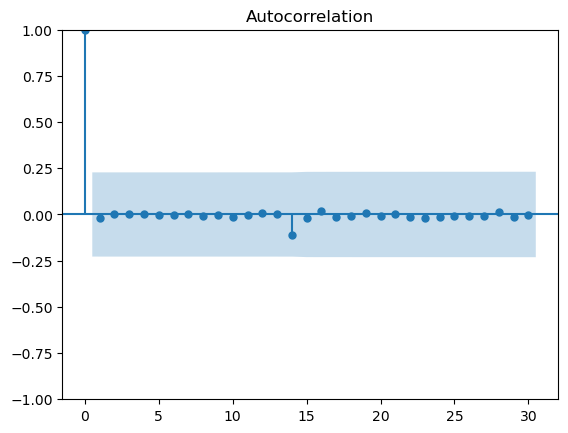

In [22]:
# Plot ACF of residuals
plot_acf(fitted_model.resid, lags=30)
plt.show()
